In [40]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

In [41]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
train_generator = train_datagen.flow_from_directory(
'/content/drive/MyDrive/DEEP_LEARNING _DATASETS/preprocessed/train',
target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 1000 images belonging to 4 classes.


In [44]:
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/DEEP_LEARNING _DATASETS/preprocessed/validation',
                                                             target_size=(150,150),batch_size=32,class_mode="categorical")

Found 400 images belonging to 4 classes.


In [45]:
test_generator = test_datagen.flow_from_directory(
'/content/drive/MyDrive/DEEP_LEARNING _DATASETS/preprocessed/test',target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 207 images belonging to 4 classes.


In [46]:

history = model.fit_generator(
train_generator,
steps_per_epoch=30,
epochs=10,
validation_data=validation_generator,
validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 4s 117ms/step - loss: 1.2502 - acc: 0.4199 - val_loss: 0.9356 - val_acc: 0.7469
Epoch 2/10
30/30 [==============================] - 3s 109ms/step - loss: 0.7969 - acc: 0.6923 - val_loss: 0.8156 - val_acc: 0.5938
Epoch 3/10
30/30 [==============================] - 3s 110ms/step - loss: 0.5912 - acc: 0.7831 - val_loss: 0.7349 - val_acc: 0.6594
Epoch 4/10
30/30 [==============================] - 3s 109ms/step - loss: 0.5263 - acc: 0.8024 - val_loss: 0.5770 - val_acc: 0.7188
Epoch 5/10
30/30 [==============================] - 3s 111ms/step - loss: 0.4639 - acc: 0.8109 - val_loss: 0.3892 - val_acc: 0.8406
Epoch 6/10
30/30 [==============================] - 3s 109ms/step - loss: 0.3835 - acc: 0.8515 - val_loss: 0.3148 - val_acc: 0.9094
Epoch 7/10
30/30 [==============================] - 3s 110ms/step - loss: 0.3562 - acc: 0.8729 - val_loss: 0.6250 - val_acc: 0.7281
Epoch 8/10
30/30 [==============================] - 3s 109ms/step - loss: 0.

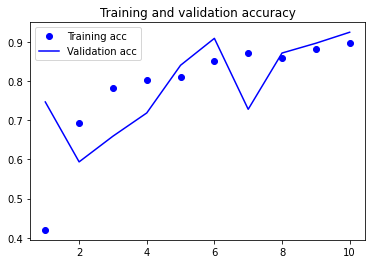

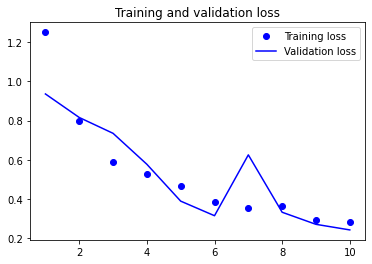

In [47]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
model.evaluate(test_generator)

7/7 [==============================] - 47s 8s/step - loss: 0.2524 - acc: 0.9130


[0.25235697627067566, 0.9130434989929199]

In [3]:
import tensorflow

In [5]:
model = tensorflow.keras.models.load_model('/content/grapes_model_91_accuracy.h5')

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [11]:
img = image.load_img("/content/00cff577-afd4-4e36-ac9c-a52aa6ae5949___FAM_B.Rot 0508_final_masked.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [29]:
prediction

array([[0.6837362 , 0.07288897, 0.23173718, 0.01163759]], dtype=float32)